# url: https://pythondatascience.plavox.info/scikit-learn/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E5%88%86%E6%9E%90-k-means

# scikit-learn でクラスタ分析 (K-means 法)

## クラスタ分析とは
クラスタ分析 (クラスタリング, Clustering) とは、ラベル付けがなされていないデータに対して、近しい属性を持つデータをグループ化する手法です。例をあげると、以下のような活用方法があり、マーケティング施策や商品の企画開発などに活用することます。

    製品ごとの特徴 (自動車であれば、価格や定員、燃費、排気量、直近の販売台数) を用いて類似の製品をグループ化
    店舗の特徴 (スーパーであれば、売上や面積、従業員数、来客数、駐車場の数) から類似の店舗をグループ化
    顧客の特徴 (銀行であれば、性別、年齢、貯蓄残高、毎月の支出、住宅ローンの利用有無など) を用いて似たような利用傾向の顧客をグループ化

クラスタ分析には大別して、K-Means に代表される「非階層的クラスタ分析」と Ward 法 (ウォード法) に代表される「階層的クラスタリング」の2種類が存在します。本ページでは、非階層的クラスタ分析の代表例である K-Means 法を用いたクラスタリングについて解説します。

## 非階層的クラスタリング

非階層的クラスタリング (例: K-Means 法) では、決められたクラスタ数にしたがって、近い属性のデータをグループ化します。以下の図では、3つのクラスタに分類しましたが、それぞれの色でどのクラスタに分類されたかを示しています。

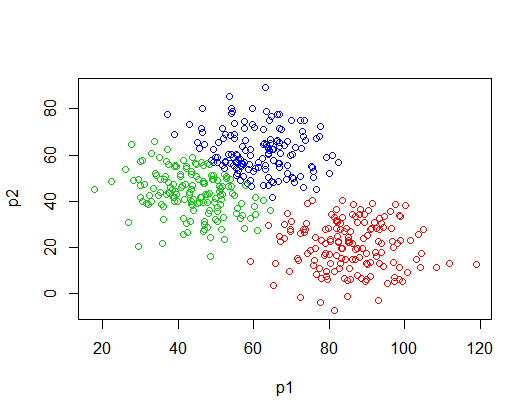

## 階層的クラスタリング

階層的クラスタリング (例: Ward 法) では、クラスタリングの結果を木構造で出力する特徴があります。縦方向の長さ (深さ) は類似度を示し、長いほど類似度が低く、短いほど類似度が高いことを示します。

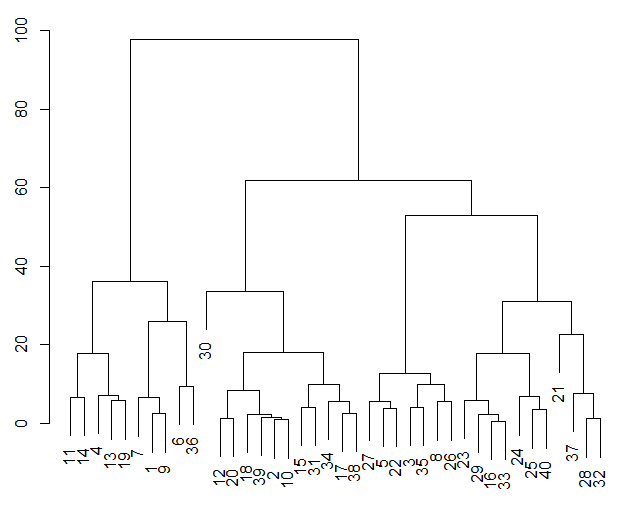

## K-Means法とは

K-Means 法 (K-平均法ともいいます) は、基本的には、以下の 3 つの手順でクラスタリングを行います。

1. 初期値となる重心点をサンプルデータ (データセット全体からランダムに集めた少量のデータ) から決定。

2. 各サンプルから最も近い距離にある重心点を計算によって求め、クラスタを構成。

3. 2.で求めたクラスタごとに重心を求め、2. を再度実行する。2. ～ 3. を決められた回数繰り返し実行し、大きな変化がなくなるまで計算。

## scikit-learn を用いたクラスタ分析の実行例
scikit-learn を用いてクラスタ分析を行う手順を紹介します。

## 今回使用するデータ
今回は、UC バークレー大学の UCI Machine Leaning Repository にて公開されている、「Wholesale customers Data Set (卸売業者の顧客データ)」を利用します。

データセットの構成は以下のようになっています。各行が顧客 1 件を指し、440 件の顧客データが格納されています。

    Channel	販売チャネル。1: Horeca (ホテル・レストラン・カフェ), 2: 個人向け小売
    Region	各顧客の地域。1: リスボン市, 2: ポルト市, 3: その他
    Fresh	生鮮品の年間注文額
    Milk	生鮮品の年間注文額
    Grocery	食料雑貨の年間注文額
    Frozen	冷凍食品の年間注文額
    Detergents_Paper	衛生用品と紙類の年間注文額
    Delicassen	惣菜の年間注文額

データセットの詳細は以下にて確認可能です。

UCI Machine Learning Repository: Wholesale customers Data: https://archive.ics.uci.edu/dataset/292/wholesale+customers


## 分析用コード

以下のコードを実行して、クラスタ分析を実行できます。今回は、440 件の顧客を購買傾向に基づいて、4 つのクラスタに分類します。
(※ K-Means 法は初期値に乱数を使用する関係上、必ずしも以下の結果通りにクラスタ番号が決定するとは限りません)

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# データセットを読み込み
cust_df = pd.read_csv("http://pythondatascience.plavox.info/wp-content/uploads/2016/05/Wholesale_customers_data.csv")

# 不要なカラムを削除
del(cust_df['Channel'])
del(cust_df['Region'])

cust_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [2]:
cust_array = np.array([cust_df['Fresh'].tolist(),
                       cust_df['Milk'].tolist(),
                       cust_df['Grocery'].tolist(),
                       cust_df['Frozen'].tolist(),
                       cust_df['Milk'].tolist(),
                       cust_df['Detergents_Paper'].tolist(),
                       cust_df['Delicassen'].tolist()
                       ], np.int32)

# 行列を転置
cust_array = cust_array.T

# クラスタ分析を実行 (クラスタ数=4)
pred = KMeans(n_clusters=4).fit_predict(cust_array)
display(pred)

# 上記のように、440 件の各顧客にクラスタ番号 (0, 1, 2, 3) が付与されたことがわかります。

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 2, 2, 2, 0, 3, 0, 0, 0, 0, 0,
       2, 1, 2, 0, 0, 0, 3, 2, 0, 0, 2, 2, 0, 0, 2, 3, 3, 2, 2, 0, 3, 3,
       0, 3, 3, 1, 0, 3, 0, 0, 2, 3, 2, 0, 3, 3, 0, 0, 0, 1, 0, 3, 0, 3,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 3, 0, 0, 0, 3, 0, 2, 0, 1, 1, 2,
       0, 2, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 2, 0, 0, 0, 3, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 3, 3, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3,
       2, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 2, 0,
       0, 0, 3, 3, 2, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 2, 3, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       3, 3, 3, 2, 3, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0,

## 各クラスタの特徴を確認

クラスタ分析の結果を利用し、各クラスタがどのような特徴があるのかを確認します。ここでは、集計作業を楽に行うため、Pandas のデータフレームを利用します。

In [3]:
# Pandas のデータフレームにクラスタ番号を追加
cust_df['cluster_id'] = pred
display(cust_df)

# 各クラスタに属するサンプル数の分布
display(cust_df['cluster_id'].value_counts())

# 各クラスタの各部門商品の購買額の平均値
# クラスタごとに平均を表示
for cluster_id in range(cust_df['cluster_id'].nunique()):
    cluster_mean = cust_df[cust_df['cluster_id'] == cluster_id].mean()
    display(cluster_mean)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,2
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,2
436,39228,1431,764,4510,93,2346,2
437,14531,15488,30243,437,14841,1867,3
438,10290,1981,2232,1038,168,2125,0


0    280
3     78
2     75
1      7
Name: cluster_id, dtype: int64

Fresh               7983.846429
Milk                3178.850000
Grocery             4384.732143
Frozen              2679.750000
Detergents_Paper    1318.021429
Delicassen          1080.903571
cluster_id             0.000000
dtype: float64

Fresh               42117.285714
Milk                46046.142857
Grocery             42914.285714
Frozen              10211.714286
Detergents_Paper    17327.571429
Delicassen          12192.142857
cluster_id              1.000000
dtype: float64

Fresh               31538.173333
Milk                 4522.773333
Grocery              5660.666667
Frozen               5329.400000
Detergents_Paper     1076.693333
Delicassen           1963.760000
cluster_id              2.000000
dtype: float64

Fresh                4929.102564
Milk                12804.461538
Grocery             19819.064103
Frozen               1668.371795
Detergents_Paper     8932.897436
Delicassen           1739.269231
cluster_id              3.000000
dtype: float64

## Matplotlib でクラスタの傾向を可視化
先ほど求めた、各クラスタの各部門商品の購買額の平均値を Matplotlib を用いて傾向を可視化すると以下のようになります。

Matplotlib で積み上げ棒グラフを出力

[Text(0, 0, 'cluster0'),
 Text(1, 0, 'cluster1'),
 Text(2, 0, 'cluster2'),
 Text(3, 0, 'cluster3')]

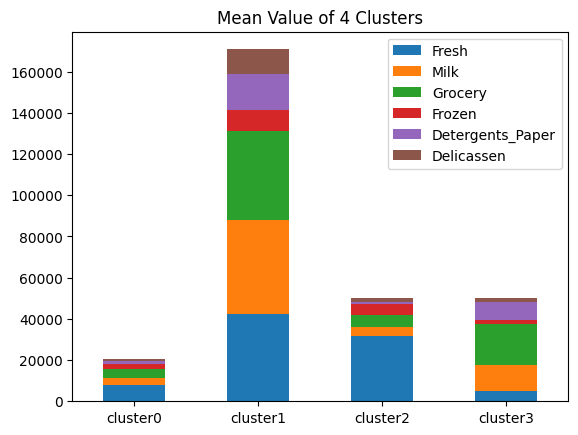

In [4]:
# 可視化（積み上げ棒グラフ）
import matplotlib.pyplot as plt

clusterinfo = pd.DataFrame()
for i in range(4):
    clusterinfo['cluster' + str(i)] = cust_df[cust_df['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')

my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of 4 Clusters")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)

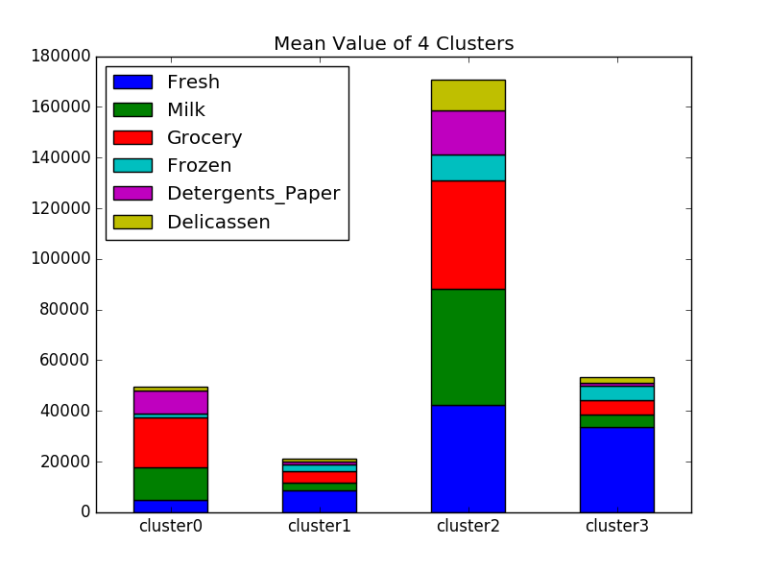

結果から、それぞれ次のように説明できます。

    クラスタ番号 = 0 に分類された顧客 (79 人) は、Grocery (食料雑貨品) と Detergents_Paper (衛生用品と紙類) の購買額が比較的高いことがわかります。
    クラスタ番号 = 1 に分類された顧客 (291 人) は、全体的に購買額が低い傾向にあります。
    クラスタ番号 = 2 に分類された顧客 (7 人) は、全てのジャンルで購買額が高いと言えます。
    クラスタ番号 = 3 に分類された顧客 (63 人) は、Fresh (生鮮食品) やFrozen (冷凍食品) の購買額が比較的高いことがわかります。
    
上記のように、クラスタ分析は簡単にデータのみからあらゆる発見を行うことに適している汎用的な手法だと言えます。皆さんが会社や研究で扱っているデータもこのように分析することで、新たな発見があるかもしれないでしょう。